In [7]:
import os 
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate, build_logistic_classifier, plot_betas
import pandas as pd

ms = load_from_json(deepcopy(math_spec_json))



## Sanity Check Scenario

Premise: Ensure the simulation framework is operating as intended, without complications from the controller.

Condition(s): Fix the values of:
- $\mathbf u$, the controller update parameters ($k_{qi}, k_{quai}$); and
- $\pmb{\beta}$, the _miner decision population parameter vector_, i.e. the parameter vector for the miner's probabilistic decision on which token to receive as block reward.

Method: MC runs (across realizations of other stochastic variables), generating time series for e.g. miner decisions and proposed block rewards. 

Placeholder has no control action options


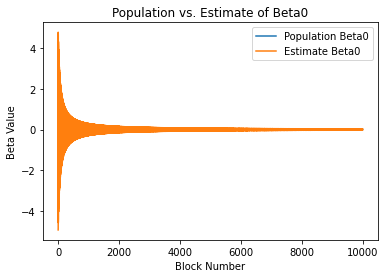

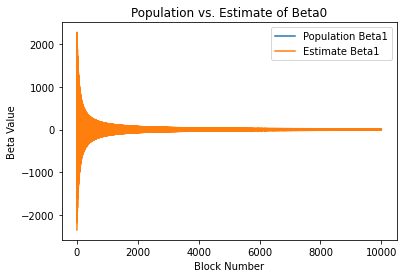

In [8]:
params_base["FP Mine Block Boundary Action"] = "TEST Mine Block Boundary Action"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])


for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, .001])


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])

df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [9]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,-4.926108,-2354.971441,0.0,0.001,1
1,-4.849661,-2318.424843,0.0,0.001,2
2,4.775549,2282.995237,0.0,0.001,3
3,4.703669,2248.632185,0.0,0.001,4
4,4.633920,2215.288242,0.0,0.001,5
...,...,...,...,...,...
9995,0.031068,14.852555,0.0,0.001,9996
9996,0.031065,14.851079,0.0,0.001,9997
9997,0.031062,14.849603,0.0,0.001,9998
9998,-0.031059,-14.848127,0.0,0.001,9999


## Sanity Check B

Above sanity check but with changing difficulties

Placeholder has no control action options


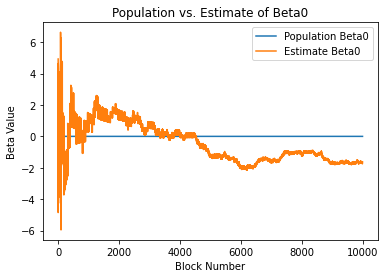

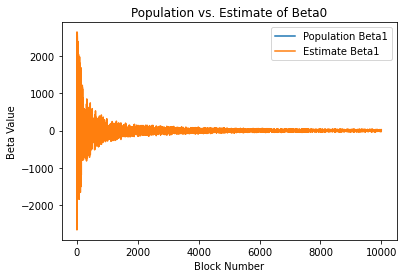

In [10]:
params_base["FP Mine Block Boundary Action"] = "TEST Mine Block Boundary Action"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [11]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.926108,2635.838359,0.0,0.001,1
1,-4.849661,-2664.517706,0.0,0.001,2
2,-4.775549,-2623.799193,0.0,0.001,3
3,-4.703669,-2584.306449,0.0,0.001,4
4,4.633920,1893.336083,0.0,0.001,5
...,...,...,...,...,...
9995,-1.688718,-4.129473,0.0,0.001,9996
9996,-1.626419,26.383519,0.0,0.001,9997
9997,-1.688382,-8.127041,0.0,0.001,9998
9998,-1.688214,-8.126233,0.0,0.001,9999


## Sanity Check C

Same difficulty but add in variations of difficulty in epochs

In [6]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

Placeholder has no control action options


KeyError: 'Mine Block Boundary Action V3'

In [4]:
print(sum([x['Ratio'] for x in state["Historical Mined Ratio"]]) / len(state["Historical Mined Ratio"]))

0.6056900421308241
